In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from scipy.stats import zscore
import warnings
warnings.filterwarnings('ignore')
from sklearn import datasets

In [2]:
d=pd.read_csv('baseball.csv')
d

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


In [3]:
df=pd.DataFrame(d)
df

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


In [4]:
df.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

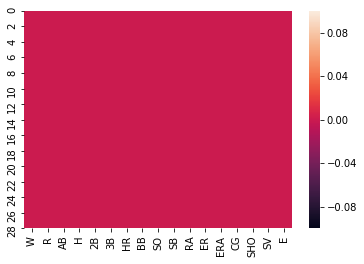

In [5]:
sns.heatmap(df.isnull())

In [6]:
df.dtypes

W        int64
R        int64
AB       int64
H        int64
2B       int64
3B       int64
HR       int64
BB       int64
SO       int64
SB       int64
RA       int64
ER       int64
ERA    float64
CG       int64
SHO      int64
SV       int64
E        int64
dtype: object

In [7]:
dfcor=df.corr()
dfcor

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
W,1.000000,0.430751,-0.087947,0.037612,0.427797,-0.251118,0.307407,0.484342,0.111850,-0.157234,-0.812952,-0.809435,-0.819600,0.080533,0.471805,0.666530,-0.089485
R,0.430751,1.000000,0.319464,0.482856,0.560084,-0.070072,0.671283,0.402452,-0.054726,0.081367,-0.041623,-0.041245,-0.049281,0.232042,-0.103274,-0.096380,-0.023262
AB,-0.087947,0.319464,1.000000,0.739122,0.453370,0.435422,-0.066983,-0.136414,-0.106022,0.372618,0.316010,0.309686,0.255551,-0.080876,-0.197321,-0.106367,0.316743
H,0.037612,0.482856,0.739122,1.000000,0.566847,0.478694,-0.090855,-0.118281,-0.398830,0.413444,0.224324,0.252489,0.231172,0.147955,-0.145559,-0.130371,-0.033173
2B,0.427797,0.560084,0.453370,0.566847,1.000000,0.220490,0.056292,0.302700,-0.150752,0.195027,-0.218160,-0.235531,-0.254854,0.306675,0.057998,0.171576,0.105754
3B,-0.251118,-0.070072,0.435422,0.478694,0.220490,1.000000,-0.430915,-0.454949,-0.141196,0.457437,0.314125,0.340225,0.330951,-0.065898,-0.041396,-0.142370,0.126678
HR,0.307407,0.671283,-0.066983,-0.090855,0.056292,-0.430915,1.000000,0.425691,0.359923,-0.136567,-0.103903,-0.085922,-0.090917,0.156502,-0.019119,-0.028540,-0.207597
BB,0.484342,0.402452,-0.136414,-0.118281,0.302700,-0.454949,0.425691,1.000000,0.233652,-0.098347,-0.416445,-0.452663,-0.459832,0.462478,0.426004,0.099445,-0.075685
SO,0.111850,-0.054726,-0.106022,-0.398830,-0.150752,-0.141196,0.359923,0.233652,1.000000,0.030968,-0.129745,-0.161612,-0.180368,-0.093418,0.237721,0.126297,0.155133
SB,-0.157234,0.081367,0.372618,0.413444,0.195027,0.457437,-0.136567,-0.098347,0.030968,1.000000,0.132290,0.143068,0.126063,-0.020783,-0.106563,-0.183418,0.079149


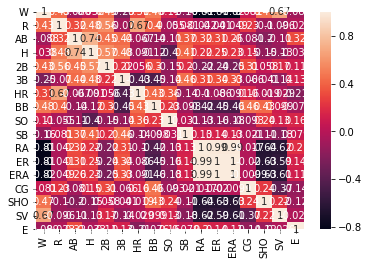

In [8]:
sns.heatmap(dfcor,annot=True)

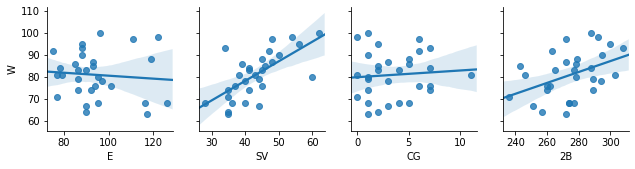

In [9]:
sns.pairplot(df,x_vars=('E','SV','CG','2B'),y_vars=('W'),aspect=0.9,kind='reg')

In [10]:
df.skew()

W      0.047089
R      1.200786
AB     0.183437
H      0.670254
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
ER     0.058710
ERA    0.053331
CG     0.736845
SHO    0.565790
SV     0.657524
E      0.890132
dtype: float64

In [11]:
for col in df.columns:
    if df.skew().loc[col]>0.55:
        df[col]=np.log1p(df[col])

In [12]:
df.skew()

W      0.047089
R      0.744813
AB     0.183437
H      0.628584
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
ER     0.058710
ERA    0.053331
CG    -0.325962
SHO   -0.589640
SV     0.163057
E      0.632916
dtype: float64

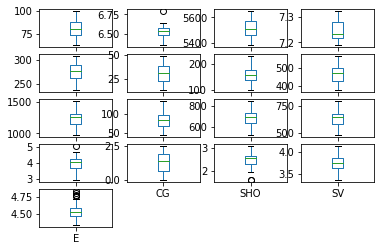

In [13]:
df.plot(kind='box',subplots=True,layout=(5,4))
plt.show()

In [14]:
from scipy.stats import zscore
z=np.abs(zscore(df))
df_new=df[(z<3).all(axis=1)]
df_new

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,6.586172,5575,7.311886,300,42,139,383,973,104,641,601,3.73,1.098612,2.197225,4.043051,4.488636
1,83,6.546785,5467,7.207860,277,44,156,439,1264,70,700,653,4.07,1.098612,2.564949,3.828641,4.465908
2,81,6.507278,5439,7.241366,303,29,141,533,1157,86,640,584,3.67,2.484907,2.397895,3.663562,4.382027
3,76,6.434547,5533,7.231287,260,27,136,404,1231,68,701,643,3.98,2.079442,2.302585,3.637586,4.624973
4,74,6.536692,5605,7.323831,289,49,151,455,1259,83,803,746,4.64,2.079442,2.564949,3.583519,4.465908
6,87,6.639876,5567,7.242798,272,19,212,554,1227,63,698,652,4.03,1.386294,1.609438,3.891820,4.543295
7,81,6.570883,5485,7.223296,246,20,217,418,1331,44,693,646,4.05,0.000000,2.397895,3.784190,4.356709
8,80,6.469250,5485,7.232733,278,32,167,436,1310,87,642,604,3.74,0.693147,2.564949,4.110874,4.564348
9,78,6.618739,5640,7.310550,294,33,161,478,1148,71,753,694,4.31,1.386294,2.397895,3.713572,4.584967
10,88,6.622736,5511,7.258412,279,32,172,503,1233,101,733,680,4.24,1.791759,2.302585,3.828641,4.787492


In [16]:
x=df.iloc[:,1:]
x

,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,6.586172,5575,7.311886,300,42,139,383,973,104,641,601,3.73,1.098612,2.197225,4.043051,4.488636
1,6.546785,5467,7.207860,277,44,156,439,1264,70,700,653,4.07,1.098612,2.564949,3.828641,4.465908
2,6.507278,5439,7.241366,303,29,141,533,1157,86,640,584,3.67,2.484907,2.397895,3.663562,4.382027
3,6.434547,5533,7.231287,260,27,136,404,1231,68,701,643,3.98,2.079442,2.302585,3.637586,4.624973
4,6.536692,5605,7.323831,289,49,151,455,1259,83,803,746,4.64,2.079442,2.564949,3.583519,4.465908
5,6.793466,5509,7.300473,308,17,232,570,1151,88,670,609,3.80,2.079442,2.397895,3.555348,4.488636
6,6.639876,5567,7.242798,272,19,212,554,1227,63,698,652,4.03,1.386294,1.609438,3.891820,4.543295
7,6.570883,5485,7.223296,246,20,217,418,1331,44,693,646,4.05,0.000000,2.397895,3.784190,4.356709
8,6.469250,5485,7.232733,278,32,167,436,1310,87,642,604,3.74,0.693147,2.564949,4.110874,4.564348
9,6.618739,5640,7.310550,294,33,161,478,1148,71,753,694,4.31,1.386294,2.397895,3.713572,4.584967


In [17]:
y=df.iloc[:,0]
y

0      95
1      83
2      81
3      76
4      74
5      93
6      87
7      81
8      80
9      78
10     88
11     86
12     85
13     76
14     68
15    100
16     98
17     97
18     68
19     64
20     90
21     83
22     71
23     67
24     63
25     92
26     84
27     79
28     74
29     68
Name: W, dtype: int64

In [20]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[ 0.66532946,  0.84773126,  1.64938177,  1.42017307,  1.04119304,
        -0.7872986 , -1.53490242, -2.69762957,  0.91388329, -0.66623393,
        -0.50511008, -0.50695519, -0.27892148, -0.72910756,  1.58127344,
        -0.42706021],
       [ 0.17956168, -0.71109353, -0.98165584,  0.12740339,  1.23580856,
        -0.24396668, -0.5365919 ,  0.15487844, -0.60182558,  0.16597077,
         0.24892985,  0.25459752, -0.27892148,  0.32263825,  0.336185  ,
        -0.59169263],
       [-0.30770406, -1.1152333 , -0.13421019,  1.58879521, -0.22380785,
        -0.7233772 ,  1.13914361, -0.89398189,  0.11144918, -0.68033909,
        -0.75162313, -0.64134684,  1.76277761, -0.15516048, -0.62244106,
        -1.19928939],
       [-1.20472969,  0.24152162, -0.38913576, -0.82812203, -0.41842337,
        -0.8831807 , -1.16053598, -0.16860185, -0.69098493,  0.18007593,
         0.10392217,  0.05301004,  1.16561891, -0.42776132, -0.77328196,
         0.56049482],
       [ 0.05507026,  1.28073815,  1

In [21]:
def maxr2_score(regr,x,y):
    max_r_score=0
    for r_state in range(42,100):
        x_train, x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=.20)
        regr.fit(x_train,y_train)
        y_pred=regr.predict(x_test)
        r2_scr=r2_score(y_test,y_pred)
        print('r2 score corresponding to ',r_state,'is',r2_scr)
        if r2_scr>max_r_score:
            max_r_score=r2_scr
            final_r_state=r_state
        
    print('max r2_score corresponding to',final_r_state,'is',max_r_score)
    return final_r_state

In [22]:
lreg=LinearRegression()
maxr2_score(lreg,x,y)

r2 score corresponding to  42 is 0.8040230760493967
r2 score corresponding to  43 is -0.5270300230491551
r2 score corresponding to  44 is 0.7532264252118765
r2 score corresponding to  45 is 0.807820112048653
r2 score corresponding to  46 is 0.3121404806108595
r2 score corresponding to  47 is 0.6500055183797289
r2 score corresponding to  48 is 0.8921815863717009
r2 score corresponding to  49 is -0.24162824704326935
r2 score corresponding to  50 is 0.6125549749304968
r2 score corresponding to  51 is 0.4410075024006448
r2 score corresponding to  52 is 0.5496042930627532
r2 score corresponding to  53 is 0.4295889236110886
r2 score corresponding to  54 is 0.6728792808445144
r2 score corresponding to  55 is 0.8354205204519134
r2 score corresponding to  56 is 0.22451789309279724
r2 score corresponding to  57 is -0.5755020933494832
r2 score corresponding to  58 is 0.24993207729317024
r2 score corresponding to  59 is -0.28561712297396635
r2 score corresponding to  60 is -0.6780104490854368
r2 s

48

In [24]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
lsreg=Lasso()
parameters={'alpha':[0.001,0.01,0.1,1]}
clf=GridSearchCV(lsreg,parameters,cv=10)
clf.fit(x,y)
clf.best_params_

{'alpha': 1}

In [25]:
lsreg=Lasso(alpha=1)
r_state=maxr2_score(lsreg,x,y)

r2 score corresponding to  42 is 0.8067075436001089
r2 score corresponding to  43 is 0.3661721638591896
r2 score corresponding to  44 is 0.924804651661109
r2 score corresponding to  45 is 0.8436734391979004
r2 score corresponding to  46 is 0.8127860191338168
r2 score corresponding to  47 is 0.8981561858182381
r2 score corresponding to  48 is 0.9263984803223262
r2 score corresponding to  49 is 0.8818094553870583
r2 score corresponding to  50 is 0.6487336062460836
r2 score corresponding to  51 is 0.5726323528587273
r2 score corresponding to  52 is 0.7284914649679701
r2 score corresponding to  53 is 0.5179847114062174
r2 score corresponding to  54 is 0.8856521619478036
r2 score corresponding to  55 is 0.6710151101801405
r2 score corresponding to  56 is 0.8585504272499456
r2 score corresponding to  57 is 0.5786517716481032
r2 score corresponding to  58 is 0.6054324775405591
r2 score corresponding to  59 is 0.6230723401052751
r2 score corresponding to  60 is 0.8162189530670461
r2 score corr

In [27]:
from sklearn.model_selection import cross_val_score
print('Mean r2 score of Linear Regression',cross_val_score(lreg,x,y,cv=5,scoring='r2').mean())
print('STD of Linear regression:',cross_val_score(lreg,x,y,cv=5,scoring='r2').std())

print ('mean of Lasso regressor is',cross_val_score(lsreg,x,y,cv=5,scoring='r2').mean())
print ('std deviation of the Lasso regressor is ',cross_val_score(lsreg,x,y,cv=5,scoring='r2').std())

Mean r2 score of Linear Regression -0.3343451180690461
STD of Linear regression: 1.7721685821584732
mean of Lasso regressor is 0.5688218593343983
std deviation of the Lasso regressor is  0.39075009063242927


In [28]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=99,test_size=0.20)
lsreg=Lasso()
lsreg.fit(x,y)
y_pred=lsreg.predict(x_test)

In [29]:
np.sqrt(mean_squared_error(y_test,y_pred))

2.938451867299581

In [30]:
r2_score(y_test,y_pred)


0.936263691295528

In [31]:
mean_squared_error(y_test,y_pred)

8.634499376436397

In [32]:
from sklearn.externals import joblib
joblib.dump(lsreg,'Project_7.pkl')

['Project_7.pkl']